# Energy modelling of a DRI shaft furnace

A direct reduction shaft furnace, a counter flow reactor , where iron ore is fed from the top and reacting gases enter the reactor from the periphary and move towards the top. The solid-gas reaction occurs optimally at 800 C. 

<img src="DRI_fig.jpg">

In [1]:
alpha=0.94 # Metallization rate considered for the DRI reduction shaft furnace
Total_fe2O3=0.95 # 5% Impurities are considered in the iron ore which gets transferred into the EAF as it is 
iron_oxygen_ratio=112/160 # percentage of iron in one mole of iron ore 
iron_ore_dri=1/(Total_fe2O3*iron_oxygen_ratio)# Weight of total iron ore fed to the DRI and EAF to get 1 ton of liquid steel
Feo_percentage=iron_ore_dri*Total_fe2O3*(1-alpha)*iron_oxygen_ratio # Depends on the slag content , metallization rate 
print("FeO percentage :",Feo_percentage)
SIO2_percentage=3 # Percentage of silica in the Slag 
Al2O3_percentage=2 #Percentage of alumina in the Slag
#CAO_percentage=4.5 #Percentage of lime added in the EAF slag is higher for DRI as the gangue content is higher making the system acidic
#MGO_percentage=0.53 #Percentage of Magnesium oxide in the EAF slag
SIO2_weight=(iron_ore_dri*SIO2_percentage)/100 # SiO2 weight in ton 
print(SIO2_weight)
AL2O3_weight=(iron_ore_dri*Al2O3_percentage)/100 # weight in ton
print(AL2O3_weight)
#CAO_weight=(iron_ore_dri*CAO_percentage)/100 #weioght in ton
#print(CAO_weight*1000)
#MGO_weight=(iron_ore_dri*MGO_percentage)/100 #weight in ton 
#carbon_weight=8 # Weight of carbon in Kg added per ton for reduction of remaining FeO and production of carbon monoxide in the EAF for froth making which is essential for the smooth functioning of then EAF
#print("Weight of metallic iron",Total_fe_metal) #in ton
#print("Weight of iron oxide",FEO_weight) # in ton
print("Weight of iron ore fed to the shaft furnace to produce one ton of liquid steel in the DRI_EAF process",iron_ore_dri)



FeO percentage : 0.06000000000000005
0.04511278195488722
0.030075187969924814
Weight of iron ore fed to the shaft furnace to produce one ton of liquid steel in the DRI_EAF process 1.5037593984962407


## Enthalpy calculations for Fe2O3

In [2]:
def fe2o3_enthalpy_1(T):# T1 and T2 should be in the range of 298-950 K 
    t=T/1000
    A=93.43834
    B=108.3577
    C=-50.86447
    D=25.58683
    E=-1.611330
    F=-863.2094
    G=161.0719
    H=-825.5032 
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
def fe2o3_enthalpy_2(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=150.6240
    B=0
    C=0
    D=0
    E=0
    F=-875.6066
    G=252.8814
    H=-825.5032
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
def fe2o3_enthalpy_3(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=110.9362
    B=32.04714
    C=-9.192333
    D=0.901506
    E=5.433677
    F=-843.1471
    G=228.3548
    H=-825.5032
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
T1=298 # K Ambient temperature / Temperature of the incoming iron pellets
T2=1073 # K Temperature of the iron ore for reduction process
if T2 in range(298,951):
    Fe2o3_En_per_mol=fe2o3_enthalpy_1(T2)
elif T2 in range(951,1051):
     Fe2o3_En_per_mol=fe2o3_enthalpy_2(T2)
elif T2 in range(1051,2501):
     Fe2o3_En_per_mol=fe2o3_enthalpy_3(T2)
mol_weight_fe2o3=159.688 #in grams
mol_per_ton_Fe2o3=1000000/mol_weight_fe2o3 # 1 ton= 10^6 grams 
Fe2o3_En_per_ton=Fe2o3_En_per_mol*mol_per_ton_Fe2o3
H_Fe2o3=((Fe2o3_En_per_ton))*iron_ore_dri # Energy consumption in KJ
print("Enthalpy of Iron ore in KJ/kg :",Fe2o3_En_per_ton/1000)
print(" Enthalpy of iron ore in kJ :",H_Fe2o3) 


Enthalpy of Iron ore in KJ/kg : 696.9118484140238
 Enthalpy of iron ore in kJ : 1047987.7419759757


In [3]:
""" Energy required to heat the impurities from 298 K to 800 K"""

def sio2_enthalpy(T):
    t=T/1000
    A=58.75
    B=10.279
    C=-0.131384
    D=0.025210
    E=0.025601
    F=-929.3292
    G=105.8092
    H=-910.8568   
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_Sio2=60.0843 #in grams
#H_f=(910.86 /60.0843)*1000 # Melting enthalpy of SiO2 is 1710 C
H_T1=sio2_enthalpy(T1) # Enthalpy of DRI at the input 
H_T2=sio2_enthalpy(T2) # Enthalpy of molten steel at the output
En_per_mol_sio2=H_T2-H_T1
    #print("Energy per mol",En_per_mol)
mol_per_ton_sio2=1000000/mol_weight_Sio2# 1 ton= 10^6 grams 
En_sio2=(En_per_mol_sio2*mol_per_ton_sio2)*SIO2_weight ## Energy per ton of SiO2 multiplied by the weight of sio2 in the solid stream
En_total_sio2=En_sio2 # H_f needs to be added only when there is a conversion from solid to liquid 

print("Enthalpy of sio2 in KJ",En_sio2)


"""Reference : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1344281&Mask=2"""
def Al2O3_enthalpy(T):
    t=T/1000
    A=106.0880
    B=36.33740
    C=-13.86730
    D=2.141221
    E=-3.133231
    F=-1705.970
    G=153.9350
    H=-1662.300  
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_al2o3=101.9613 #in grams
#H_f=(1675.69 /mol_weight_al2o3)*1000 # Melting point of alumina is 2073 C
H_T1=Al2O3_enthalpy(T1) # Enthalpy of DRI at the input 
H_T2=Al2O3_enthalpy(T2) # Enthalpy of molten steel at the output
En_per_mol_al2o3=H_T2-H_T1
print("Energy per mole al2o3",En_per_mol_al2o3)

mol_per_ton_al2o3=1000000/mol_weight_al2o3# 1 ton= 10^6 grams 
En_al2o3=En_per_mol_al2o3*mol_per_ton_al2o3*AL2O3_weight # Energy per ton of Al2O3 multiplied by the weight of Al2O3
En_total_al2o3=En_al2o3
print("Energy per ton of aluminium oxide",En_al2o3) #In Kj/ton



Enthalpy of sio2 in KJ 38299.203208586274
Energy per mole al2o3 89.04600596858086
Energy per ton of aluminium oxide 26265.60633766063


### Electrical energy required for heating Iron ore 

In [4]:
eta_el_heat=0.85 # Electrical heating efficiency 
H_ore_heat=(H_Fe2o3+En_sio2+En_al2o3)/eta_el_heat # In KJ
print("Electrical energy required for heating the iron ore to reduction temperature (in KJ):",H_ore_heat) # in KJ

Electrical energy required for heating the iron ore to reduction temperature (in KJ): 1308885.3547320266


## Enthalpy calculations for Fe

In [5]:
def fe_enthalpy(T):
    t=T/1000
    A=23.97449
    B=8.367750
    C=0.000277
    D=-0.000088
    E=-0.000005
    F=0.268027
    G=62.06336
    H=7.788015    
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
#H_f=247000 # Melting enthalpy of steel per ton in Kj/ton https://materialsdata.nist.gov/bitstream/handle/11115/166/Thermophysical%20Properties.pdf?sequence=3
T_dri=873
En_per_mol_fe=fe_enthalpy(T_dri)# Enthalpy of direct reduced iron at the output of the reactor
print(En_per_mol_fe)
mol_weight_fe=55.845 #in grams
mol_per_ton_fe=1000000/mol_weight_fe # 1 ton= 10^6 grams 
En_per_ton_fe=En_per_mol_fe*mol_per_ton_fe
print("Energy per ton of DRI", En_per_ton_fe) #In Kj/ton


16.598448621690686
Energy per ton of DRI 297223.5405441971


## Hydrogen enthalpy calculations 

In [6]:
def H2_enthalpy_1(T):# T1 and T2 should be in the range of 298-1000 K 
    t=T/1000
    A=33.066718
    B=-11.363417
    C=11.432816
    D=-2.772874
    E=-0.158558
    F=-9.980797
    G=172.707974
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t

def H2_enthalpy_2(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=18.563083
    B=12.257357
    C=-2.859786
    D=0.268238
    E=1.977990
    F=-1.147438
    G=156.288133
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
T1=298 # K Ambient temperature / Temperature of the incoming iron pellets
T2=1173 # K Temperature of the iron ore for reduction process1
if T2 in range(298,1001):
    H2_En_per_mol=H2_enthalpy_1(T2)
elif T2 in range(1001,2501):
     H2_En_per_mol=H2_enthalpy_2(T2)
mol_weight_H2=2.01588 #in grams
mol_per_kg_H2=1000/mol_weight_H2 # Number of moles in one kg 
H2_EN_per_kg=(mol_per_kg_H2)*(H2_En_per_mol)
print("Enthalpy per Kg of hydrogen in kJ/kg :",H2_EN_per_kg)


Enthalpy per Kg of hydrogen in kJ/kg : 12878.665081966752


## Stochiometric calculations for the amount of Hydrogen required for reduction of iron

In [7]:
H2_per_mol=3 # to reduce 1 mole of iron oxide or hematite 3 moles of hydrogen are required.
H2_weight=3*mol_weight_H2 # Weight of H2 for one mole of Fe2O3 in grams
mol_weight_fe2o3=159.688 # Molecular weight of hematite
H2_per_fe2o3=((1000/(mol_weight_fe2o3))*(H2_weight))# Weight of H2 in grams required for 1 kg of Fe2O3
H2_per_ton=(H2_per_fe2o3*1000)/1000 # Weight of hydrogen in kg to reduce 1 ton of Fe2O3

print(" Hydrogen required to reduce 1 ton of iron oxide in kg :", H2_per_ton)

 Hydrogen required to reduce 1 ton of iron oxide in kg : 37.87159961925756


### Hydrogen required for reduction of iron oxide for  1 ton of Fe production (Stoichiometric)

In [8]:
H2_per_ts=H2_per_ton*iron_ore_dri*Total_fe2O3 # only  iron ore reacts with hydrogen
print ("Hydrogen required for 1 ton of iron production in the shaft furnace, stoichiometric value in kg :",H2_per_ts)


Hydrogen required for 1 ton of iron production in the shaft furnace, stoichiometric value in kg : 54.10228517036794


 ### Hydrogen required for reduction of iron oxide for  1 ton of Fe production (Actual)

In [9]:
lambda_h2=[]

for i in range(2,11):
    print(i/2)
    lambda_h2.append(i/2) # Iteratively add values to the list of lambda_h2 to see the effect of increasing lambda_h2
H2_actual_ts=(H2_per_ts*lambda_h2[1]) # Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron
print("Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron in kg :",H2_actual_ts,lambda_h2)


1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron in kg : 81.15342775555192 [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


## Reaction enthalpy calculation


In [10]:
ny_fe2o3_hem = 1
ny_h2_hem = 3
ny_fe_hem = 2
ny_h2o_hem = 3
dHb_fe2o3 = -825500 #		 '[J/mol] formation enthalpy of hematite
dHb_w = -242000 #	 '[J/mol] formation enthalpy of water (gaseous)
dHr_hem = (dHb_w * ny_h2o_hem) - dHb_fe2o3 #'[J/mol] reaction enthalpy
print(dHr_hem) 
dhr_hem_kj=dHr_hem/1000 # reaction enthalpy kJ/mol
print(dhr_hem_kj) 
dhr_hem_kj_kg=(dhr_hem_kj/mol_weight_fe2o3)*1000 # reaction ethalpy in kj/kg
print(dhr_hem_kj_kg)
dhr_hem_kj_ton=dhr_hem_kj_kg*1000
#rint(dhr_hem_kj_ton) # kJ/ton of fe2O3 
dhr_per_ts=dhr_hem_kj_ton*iron_ore_dri*Total_fe2O3 
print(dhr_per_ts) # Amount of heat to be supplied in kJ for production of 1 ton of molten steel


99500
99.5
623.0900255498221
890128.6079283174


## Waste gas stream enthalpy calculation

It is assumed that the waste gas stream is a mixture of hydrogen and water at 400 C. Percentage of gas in each stream can be calculated by considering the stoichiometry.

## Mass flow rate of hydrogen and water 

In [17]:
# Mass flow rate of water in the waste stream per ton of steel production
mol_weight_H2O=18.0153 #in grams
water_tls=(mol_weight_H2O/mol_weight_fe)*1000
print("Amount of water in the waste stream per ton of steel production",water_tls) #kg/tls
## Calculation of the hydrogen in the waste stream 
H2_waste_stream=[]
for j in range(9):
    H2_waste_stream.append(H2_per_ts*lambda_h2[j]-1) #Kg/tls 
print("Amount of hydrogen in the waste stream per ton of steel production",H2_waste_stream)

Amount of water in the waste stream per ton of steel production 322.59468170829973
Amount of hydrogen in the waste stream per ton of steel production [53.10228517036794, 80.15342775555192, 107.20457034073588, 134.25571292591985, 161.30685551110383, 188.3579980962878, 215.40914068147177, 242.46028326665575, 269.5114258518397]


## Enthalpy of water/steam

In [18]:
def H2O_enthalpy(T):# 500 -1700 K reference :https://webbook.nist.gov/cgi/cbook.cgi?ID=C7732185&Mask=1
    t=T/1000
    A=30.09200
    B=6.832514
    C=6.793435
    D=-2.534480
    E=0.082139
    F=-250.8810
    G=223.3967
    H=-241.8264
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
T_waste=673 # K Temperature of the iron ore for reduction process1
H2O_En_per_mol=H2O_enthalpy(T_waste)
mol_per_kg_H2O=1000/mol_weight_H2O # Number of moles in one kg 
H2O_EN_per_kg=(mol_per_kg_H2O)*(H2O_En_per_mol)
print("Enthalpy per Kg of Water in kJ/kg :",H2O_EN_per_kg)

Enthalpy per Kg of Water in kJ/kg : 731.7594546013953


In [19]:
# Energy in the waste stream 
H_offgas=[]
for k in range(9):
    H_offgas.append((water_tls*H2O_EN_per_kg) +(H2_waste_stream[k]*H2_enthalpy_1(T_waste)*(1000/mol_weight_H2)))
    
print("Energy in the waste stream in Kj/tls",H_offgas) 

Energy in the waste stream in Kj/tls [524631.2595159437, 671633.1455825341, 818635.0316491246, 965636.9177157152, 1112638.8037823057, 1259640.6898488959, 1406642.5759154866, 1553644.4619820772, 1700646.3480486677]


## Energy required to heat the impurities from 298 K to 800 K

In [20]:
""" Energy required to heat the impurities from 298 K to 800 K"""

def sio2_enthalpy(T):
    t=T/1000
    A=58.75
    B=10.279
    C=-0.131384
    D=0.025210
    E=0.025601
    F=-929.3292
    G=105.8092
    H=-910.8568   
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_Sio2=60.0843 #in grams
#H_f=(910.86 /60.0843)*1000 # Melting enthalpy of SiO2 is 1710 C
H_T1=sio2_enthalpy(T1) # Enthalpy of DRI at the input 
H_T2=sio2_enthalpy(T2) # Enthalpy of molten steel at the output
En_per_mol_sio2=H_T2-H_T1
    #print("Energy per mol",En_per_mol)
mol_per_ton_sio2=1000000/mol_weight_Sio2# 1 ton= 10^6 grams 
En_sio2=(En_per_mol_sio2*mol_per_ton_sio2)*SIO2_weight ## Energy per ton of SiO2 multiplied by the weight of sio2 in the solid stream
En_total_sio2=En_sio2 # H_f needs to be added only when there is a conversion from solid to liquid 
print("Energy per ton in kJ",En_sio2) #In Kj/ton
    #print((En_total)/3600)# Specific energy consumption KWh)
H_SIO2=(En_total_sio2/3600)*(SIO2_weight)
print("Enthalpy change in kWh",H_SIO2)


"""Reference : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1344281&Mask=2"""
def Al2O3_enthalpy(T):
    t=T/1000
    A=106.0880
    B=36.33740
    C=-13.86730
    D=2.141221
    E=-3.133231
    F=-1705.970
    G=153.9350
    H=-1662.300  
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_al2o3=101.9613 #in grams
#H_f=(1675.69 /mol_weight_al2o3)*1000 # Melting point of alumina is 2073 C
H_T1=Al2O3_enthalpy(T1) # Enthalpy of DRI at the input 
H_T2=Al2O3_enthalpy(T2) # Enthalpy of molten steel at the output
En_per_mol_al2o3=H_T2-H_T1
print("Energy per mole al2o3",En_per_mol_al2o3)

mol_per_ton_al2o3=1000000/mol_weight_al2o3# 1 ton= 10^6 grams 
En_al2o3=En_per_mol_al2o3*mol_per_ton_al2o3*AL2O3_weight # Energy per ton of Al2O3 multiplied by the weight of Al2O3
En_total_al2o3=En_al2o3
print("Energy per ton of aluminium oxide",En_al2o3) #In Kj/ton
#print((En_total)/3600)# Specific energy consumption KWh)
H_AL2O3=(En_total_al2o3/3600)*(AL2O3_weight)
print("Enthalpy change in Al2o3 in EAF in kWH",H_AL2O3)


Energy per ton in kJ 43568.76414560845
Enthalpy change in kWh 0.5459744880402062
Energy per mole al2o3 102.04040607986576
Energy per ton of aluminium oxide 30098.521629083014
Enthalpy change in Al2o3 in EAF in kWH 0.25144963766986644


## Energy contained in the solid stream being fed to the EAF at 600 C 


It is assumed that the solid stream is a mixture of iron, iron oxide and impurities such as silica and alumina. The solid stream exits the reactor at a temperature of 600 C. 

In [21]:
"""#Enthalpy contained in residual FeO in the slag stream : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1345251&Mask=2"""
# The constants are used for a temperature range of 298-1650 K and the fusion enthalpy is added in the mix to account for the latent heat of fusion , whcih is an endothermic reaction
T_dri_exit=873 # Exit temperature of the FeO stream contained in the solid stream exiting the reactor
def feo_enthalpy(T):
    t=T/1000
    A=45.75120
    B=18.78553
    C=-5.952201
    D=0.852779
    E=-0.081265
    F=-286.7429
    G=110.3120
    H=-272.0441
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_feo=71.844 #in grams
En_per_mol_feo=feo_enthalpy(T_dri_exit)
print("Energy per mole feo :",En_per_mol_feo)
mol_per_ton_feo=1000000/mol_weight_feo# 1 ton= 10^6 grams 
En_per_ton_feo=En_per_mol_feo*mol_per_ton_feo
print("Energy per ton feo :",En_per_ton_feo)
En_feo=En_per_ton_feo*Feo_percentage
print("Energy contained in the feo stream exiting the reactor",En_feo) #In Kj/tls

### Energy contained in the iron ore stream
def fe_enthalpy(T):
    t=T/1000
    A=23.97449
    B=8.367750
    C=0.000277
    D=-0.000088
    E=-0.000005
    F=0.268027
    G=62.06336
    H=7.788015    
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
#H_f=247000 # Melting enthalpy of steel per ton in Kj/ton https://materialsdata.nist.gov/bitstream/handle/11115/166/Thermophysical%20Properties.pdf?sequence=3
T_dri=873
En_per_mol_fe=fe_enthalpy(T_dri)# Enthalpy of direct reduced iron at the output of the reactor
print(En_per_mol_fe)
mol_weight_fe=55.845 #in grams
mol_per_ton_fe=1000000/mol_weight_fe # 1 ton= 10^6 grams 
En_fe=En_per_mol_fe*mol_per_ton_fe*iron_ore_dri*Total_fe2O3*(alpha)*iron_oxygen_ratio
print("Energy per ton of DRI", En_fe) #In Kj/ton


H_imp_dri=(sio2_enthalpy(T_dri_exit)*mol_per_ton_sio2*SIO2_weight) +(Al2O3_enthalpy(T_dri_exit)*mol_per_ton_al2o3*AL2O3_weight) +En_feo + En_fe
print("Energy exiting through the impurities contained in the solid stream at 600 C :",H_imp_dri)


Energy per mole feo : 31.297339028199787
Energy per ton feo : 435629.1273898974
Energy contained in the feo stream exiting the reactor 26137.74764339387
16.598448621690686
Energy per ton of DRI 279390.12811154523
Energy exiting through the impurities contained in the solid stream at 600 C : 351831.67006329546


## Energy balance for the shaft furnace 


**H_h2=H_Fe2O3 + H_imp_dri+ H_offgas+ reaction_enthalpy

Enthalpy of hydrogen with different values of lambda: [696765.2108782253, 1045147.8163173379, 1393530.4217564506, 1741913.027195563, 2090295.6326346758, 2438678.2380737886, 2787060.843512901, 3135443.4489520136, 3483826.054391126]
H_difference [239059.02810269536, 440439.74747521745, 641820.46684774, 843201.1862202619, 1044581.9055927839, 1245962.624965306, 1447343.344337828, 1648724.06371035, 1850104.7830828722]


Text(0,0.5,'Enthalpy difference')

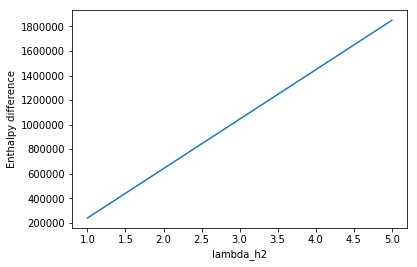

In [26]:
H_h2=[]
for i in range(9):
    H_h2.append(H2_per_ts*H2_EN_per_kg*lambda_h2[i]) # To find the value of input energy based on the variation in lambda
print("Enthalpy of hydrogen with different values of lambda:",H_h2)
 
H_difference=[] # Difference between the input energy and output energy as defined in the equation above 
for i in range(9):
    H_difference.append((H_h2[i]+H_ore_heat-H_imp_dri-H_offgas[i]-dhr_per_ts)) # value in KJ This can also be understood as the losses 
print("H_difference",H_difference)
import matplotlib.pyplot as plt 
plt.plot(lambda_h2,H_difference)
plt.xlabel('lambda_h2')
plt.ylabel('Enthalpy difference')



Text(0,0.5,'H_offgas')

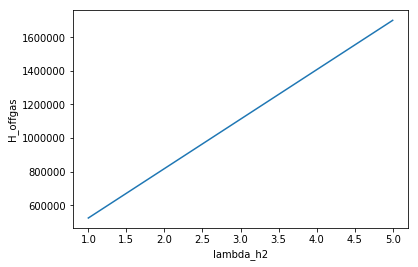

In [24]:
plt.plot(lambda_h2,H_offgas)
plt.xlabel('lambda_h2')
plt.ylabel('H_offgas')

Text(0,0.5,'H_h2')

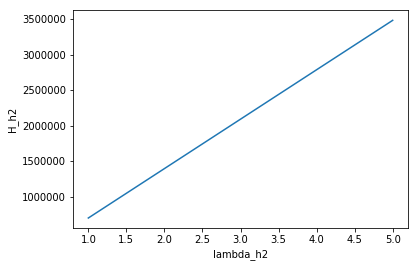

In [25]:
plt.plot(lambda_h2,H_h2)
plt.xlabel('lambda_h2')
plt.ylabel('H_h2')